In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Loading Dataset
data = pd.read_csv('loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


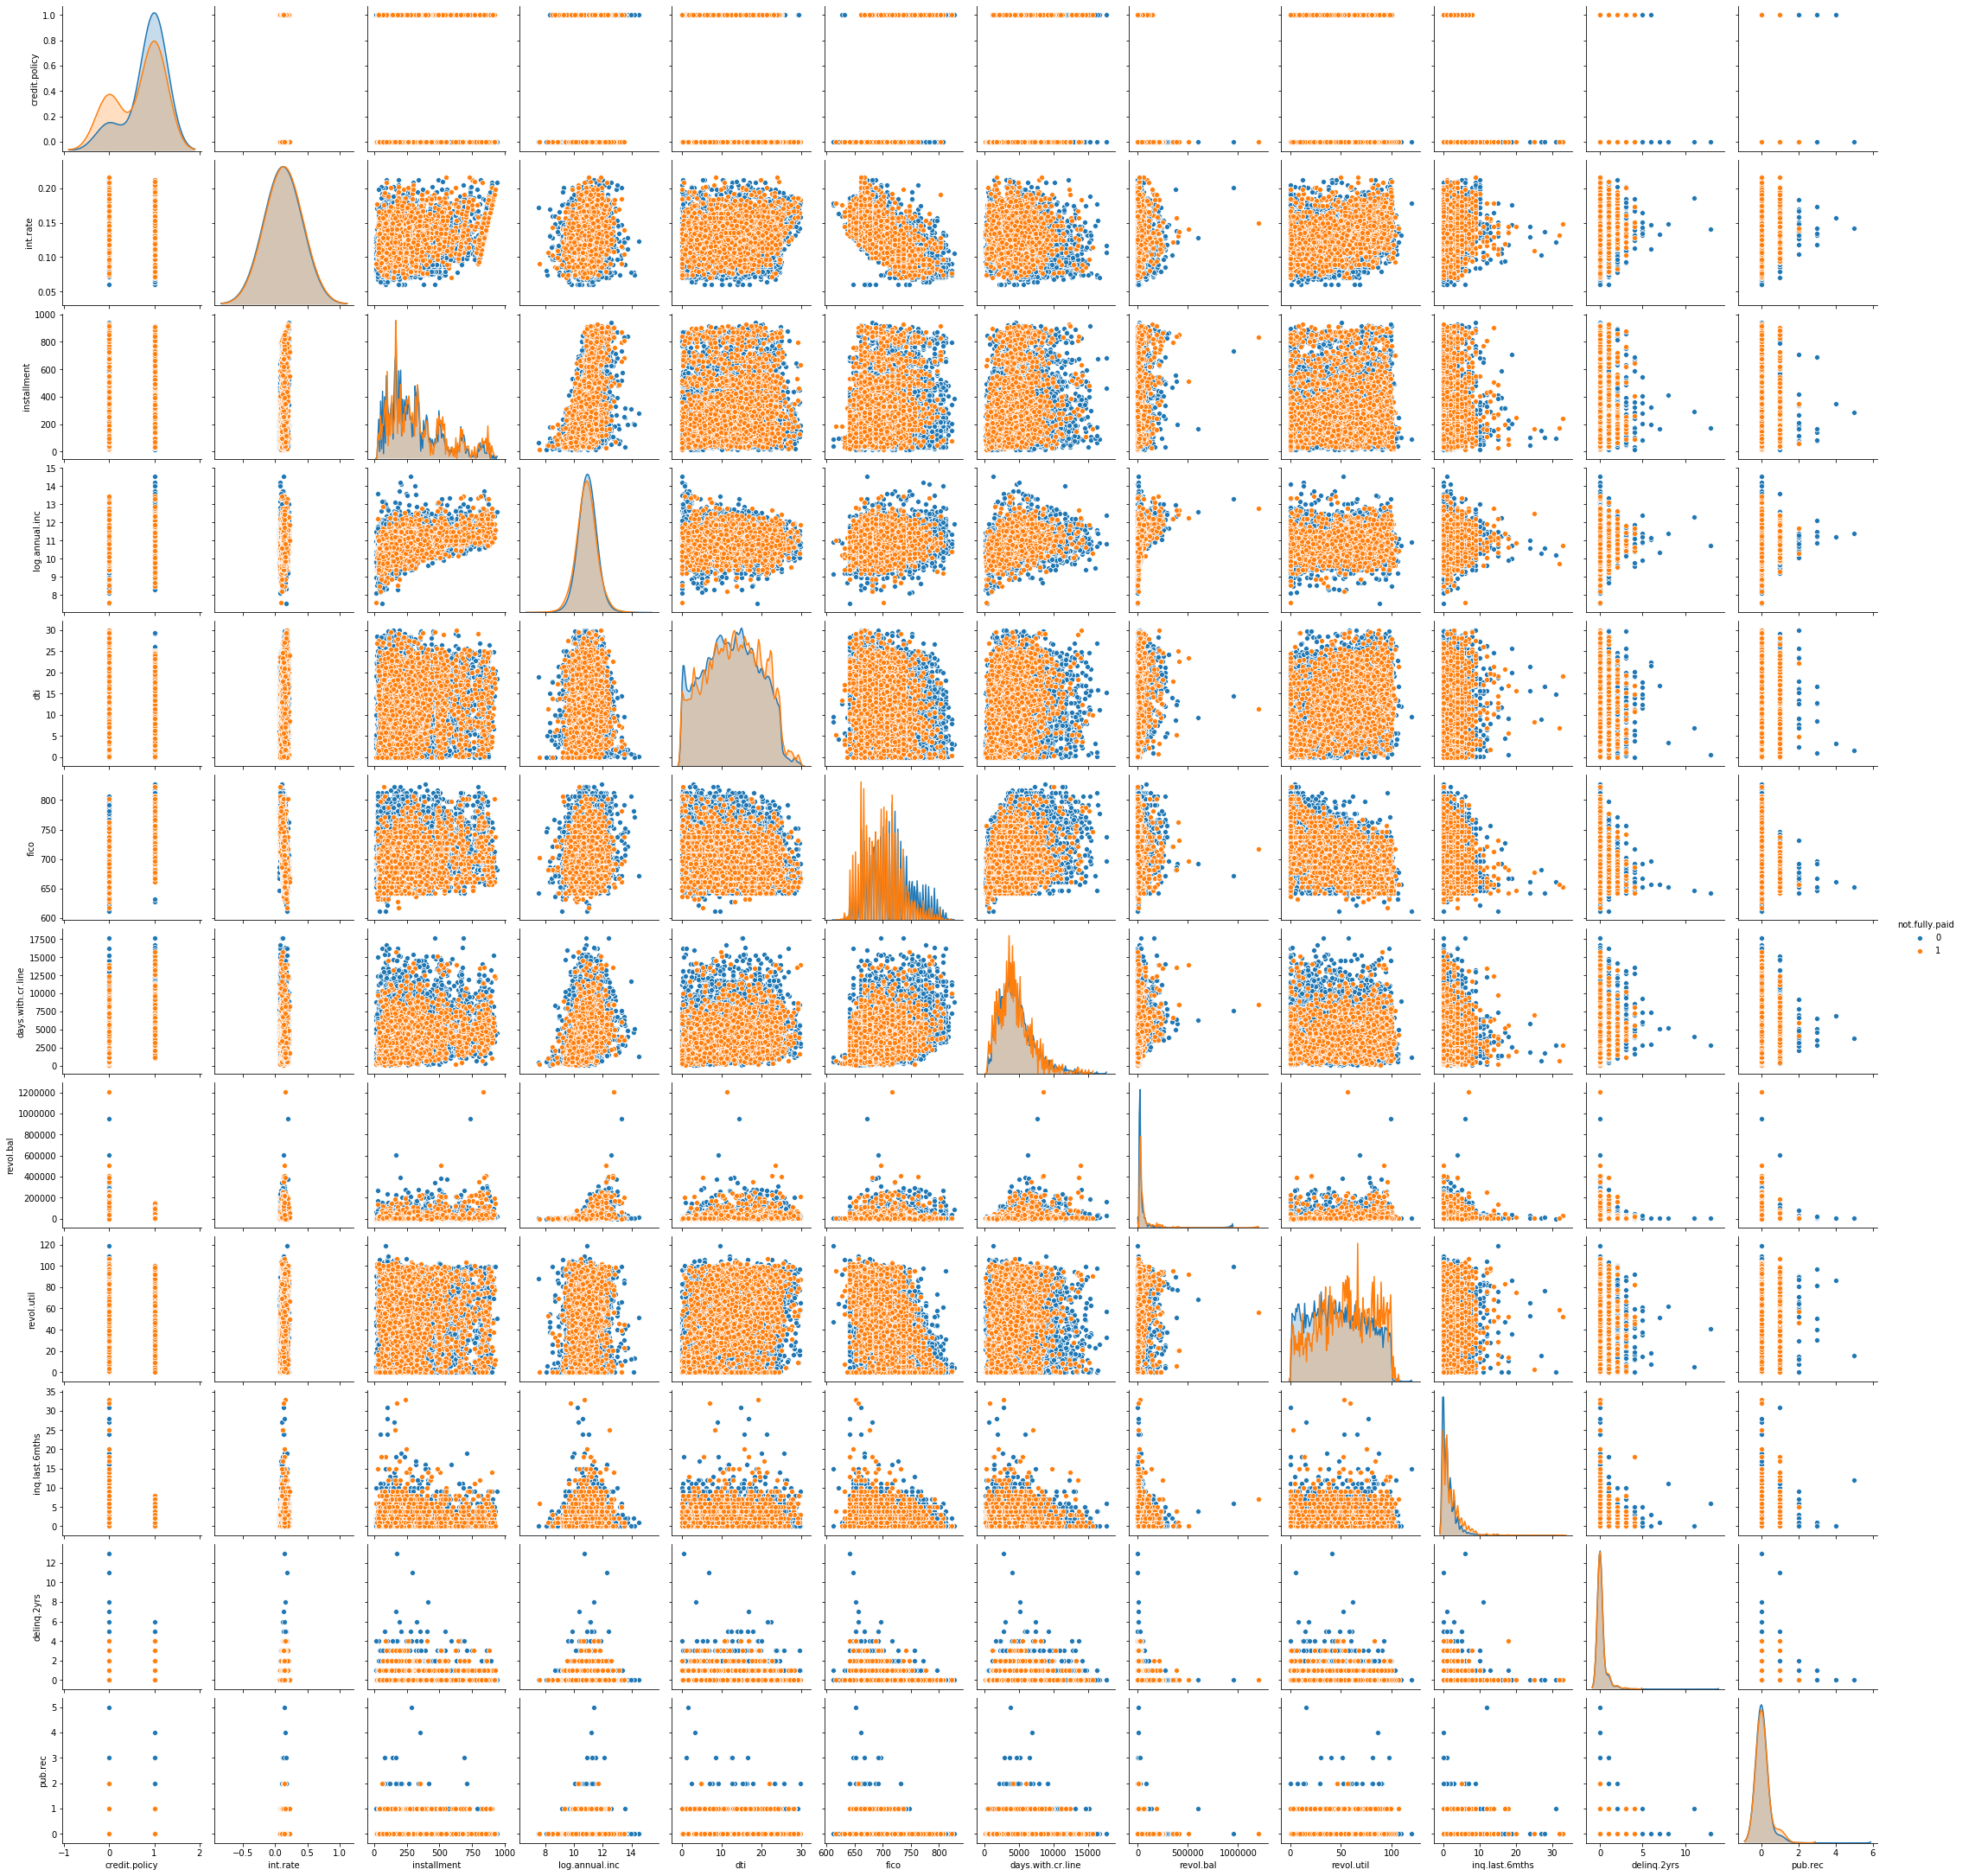

In [12]:
#Exploratory Data Analysis 
sns.pairplot(data,hue='not.fully.paid',diag_kws={'bw': 0.3})

In [15]:
#Encoding Categorical Features
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
#Train - Test Split
from sklearn.model_selection import train_test_split
x = data_encoded.drop('not.fully.paid',axis=1)
y = data_encoded['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
#Prediction
dtree_pred = dtree.predict(x_test)
dtree_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
#Evaluation
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,dtree_pred))
print()
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874


[[1986  445]
 [ 342  101]]


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
#Prediction
rfc_pred = rfc.predict(x_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#Evaluation
print(classification_report(y_test,rfc_pred))
print()
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.38      0.02      0.03       443

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.78      0.84      0.78      2874


[[2418   13]
 [ 435    8]]
